In [1]:
'''Import and first test with scikit'''

'Import and first test with scikit'

In [2]:
#modules
import csv
import collections
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import accuracy_score
% matplotlib inline

In [3]:
#files
folder='D:/IA/Kaggle/Facebook/'
training=folder+'train.csv'
small=folder+'cell.csv'

In [4]:
#load data
with open(training, 'r',newline='') as csvfile:
    reader=csv.reader(csvfile)
    print(reader.__next__())
datab=np.loadtxt(small, delimiter=",",skiprows=1)
print(datab.shape)
print(datab[0])

['row_id', 'x', 'y', 'accuracy', 'time', 'place_id']
(70890, 6)
[  5.06000000e+02   7.45800000e-01   5.13320000e+00   1.48000000e+02
   4.42772000e+05   1.06003099e+09]


In [5]:
#prepare X and y
pos_time=4
X=np.concatenate((datab[:,[1,2,3]],datab[:,[pos_time]]%1440,(datab[:,[pos_time]]//1440)%7),axis=1)
y=np.ravel(datab[:,[5]]).astype('int64')
print(X.shape)
print(X[0])

(70890, 5)
[   0.7458    5.1332  148.      692.        6.    ]


In [ ]:
# K NEAREST NEIGHBORS

In [ ]:
#prepare the algorithm

#[x,y,acc,minute(1day), day]
weights=[1/2,1,0.0005,1/18000,0.0001]
knn = KNeighborsClassifier(n_neighbors=15, 
                           algorithm='auto',
                           weights='distance',#'uniform' or 'distance'
                           metric='minkowski',
                           p=2,
                           metric_params=None, 
                           leaf_size=30, 
                           n_jobs=1)

In [ ]:
#cut train and test
test_size=10000

np.random.seed()
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]*weights
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]*weights
y_test  = y[indices[-test_size:]]

print((X*weights)[0])

In [ ]:
#train and test
knn.fit(X_train, y_train) 
print(knn.score(X_test,y_test)*100,'%')

In [ ]:
#cross validation (better than previous tests)
cvi=KFold(len(X), n_folds=5, shuffle=True, random_state=None)
scores=cross_val_score(knn, X*weights, y, scoring=None, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
print("Accuracy: {0:.2f} (+/- {1:.2f}) %".format(scores.mean()*100, scores.std() * 200))

In [ ]:
#get the predictions back
predicted = cross_val_predict(knn, X*weights, y, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
print(accuracy_score(y, predicted))

In [ ]:
# --------> 55% on test set

In [ ]:
# RANDOM FOREST

In [ ]:
#prepare

#[x,y,acc,minute(1day), day]
weights=[1/2,1,0.0005,1/18000,0.0001]
rfc = RandomForestClassifier(n_estimators=4, 
                             criterion='gini', 
                             max_depth=10, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             bootstrap=True, 
                             oob_score=False, 
                             n_jobs=1, 
                             random_state=None, 
                             verbose=0, 
                             warm_start=False, 
                             class_weight=None)

In [ ]:
#cut
test_size=10000

np.random.seed()
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]*weights
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]*weights
y_test  = y[indices[-test_size:]]

print((X*weights)[0])

In [ ]:
#train     
rfc.fit(X_train, y_train) 
print(rfc.score(X_test,y_test)*100,'%')

In [ ]:
# 52% with      !!!!! takes 5 minutes
weights=[1/2,1,0.0005,1/18000,0.0001]
rfc = RandomForestClassifier(n_estimators=10, 
                             criterion='gini', 
                             max_depth=10, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             bootstrap=True, 
                             oob_score=False, 
                             n_jobs=1, 
                             random_state=None, 
                             verbose=0, 
                             warm_start=False, 
                             class_weight=None)

In [ ]:
N_cross_validation,X,y,group=2,X,y,20

def testNrate(classifier,weights=None,output_file_name='testNrate'):
    cvi=KFold(len(X), n_folds=3, shuffle=True, random_state=None)
    predicted = cross_val_predict(knn, X*weights, y, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    right=y==predicted
    fig = plt.figure(figsize=(40, 40))
    fig.suptitle("Accuracy: {0:.2f}%".format(sum(right)/len(right)*100), fontsize=60)
    ax1 = fig.add_subplot(221,aspect=1)
    ax2 = fig.add_subplot(222,aspect=1)
    good=[(float(a),float(b)) for a,b,c in zip(X[:,[0]],X[:,[1]],right) if c]
    wrong=[(float(a),float(b)) for a,b,c in zip(X[:,[0]],X[:,[1]],right) if not c]
    ax1.scatter(*zip(*good),linewidths=0)
    ax1.set_title('Good results')
    ax2.scatter(*zip(*wrong),linewidths=0)
    ax2.set_title('Bad results')
    ax3 = fig.add_subplot(413)
    ax4 = fig.add_subplot(414)
    figures.hists_plot(ax3,ax4,y,right,group)
    fig.savefig('data/'+output_file_name+'.png')
    return fig
    

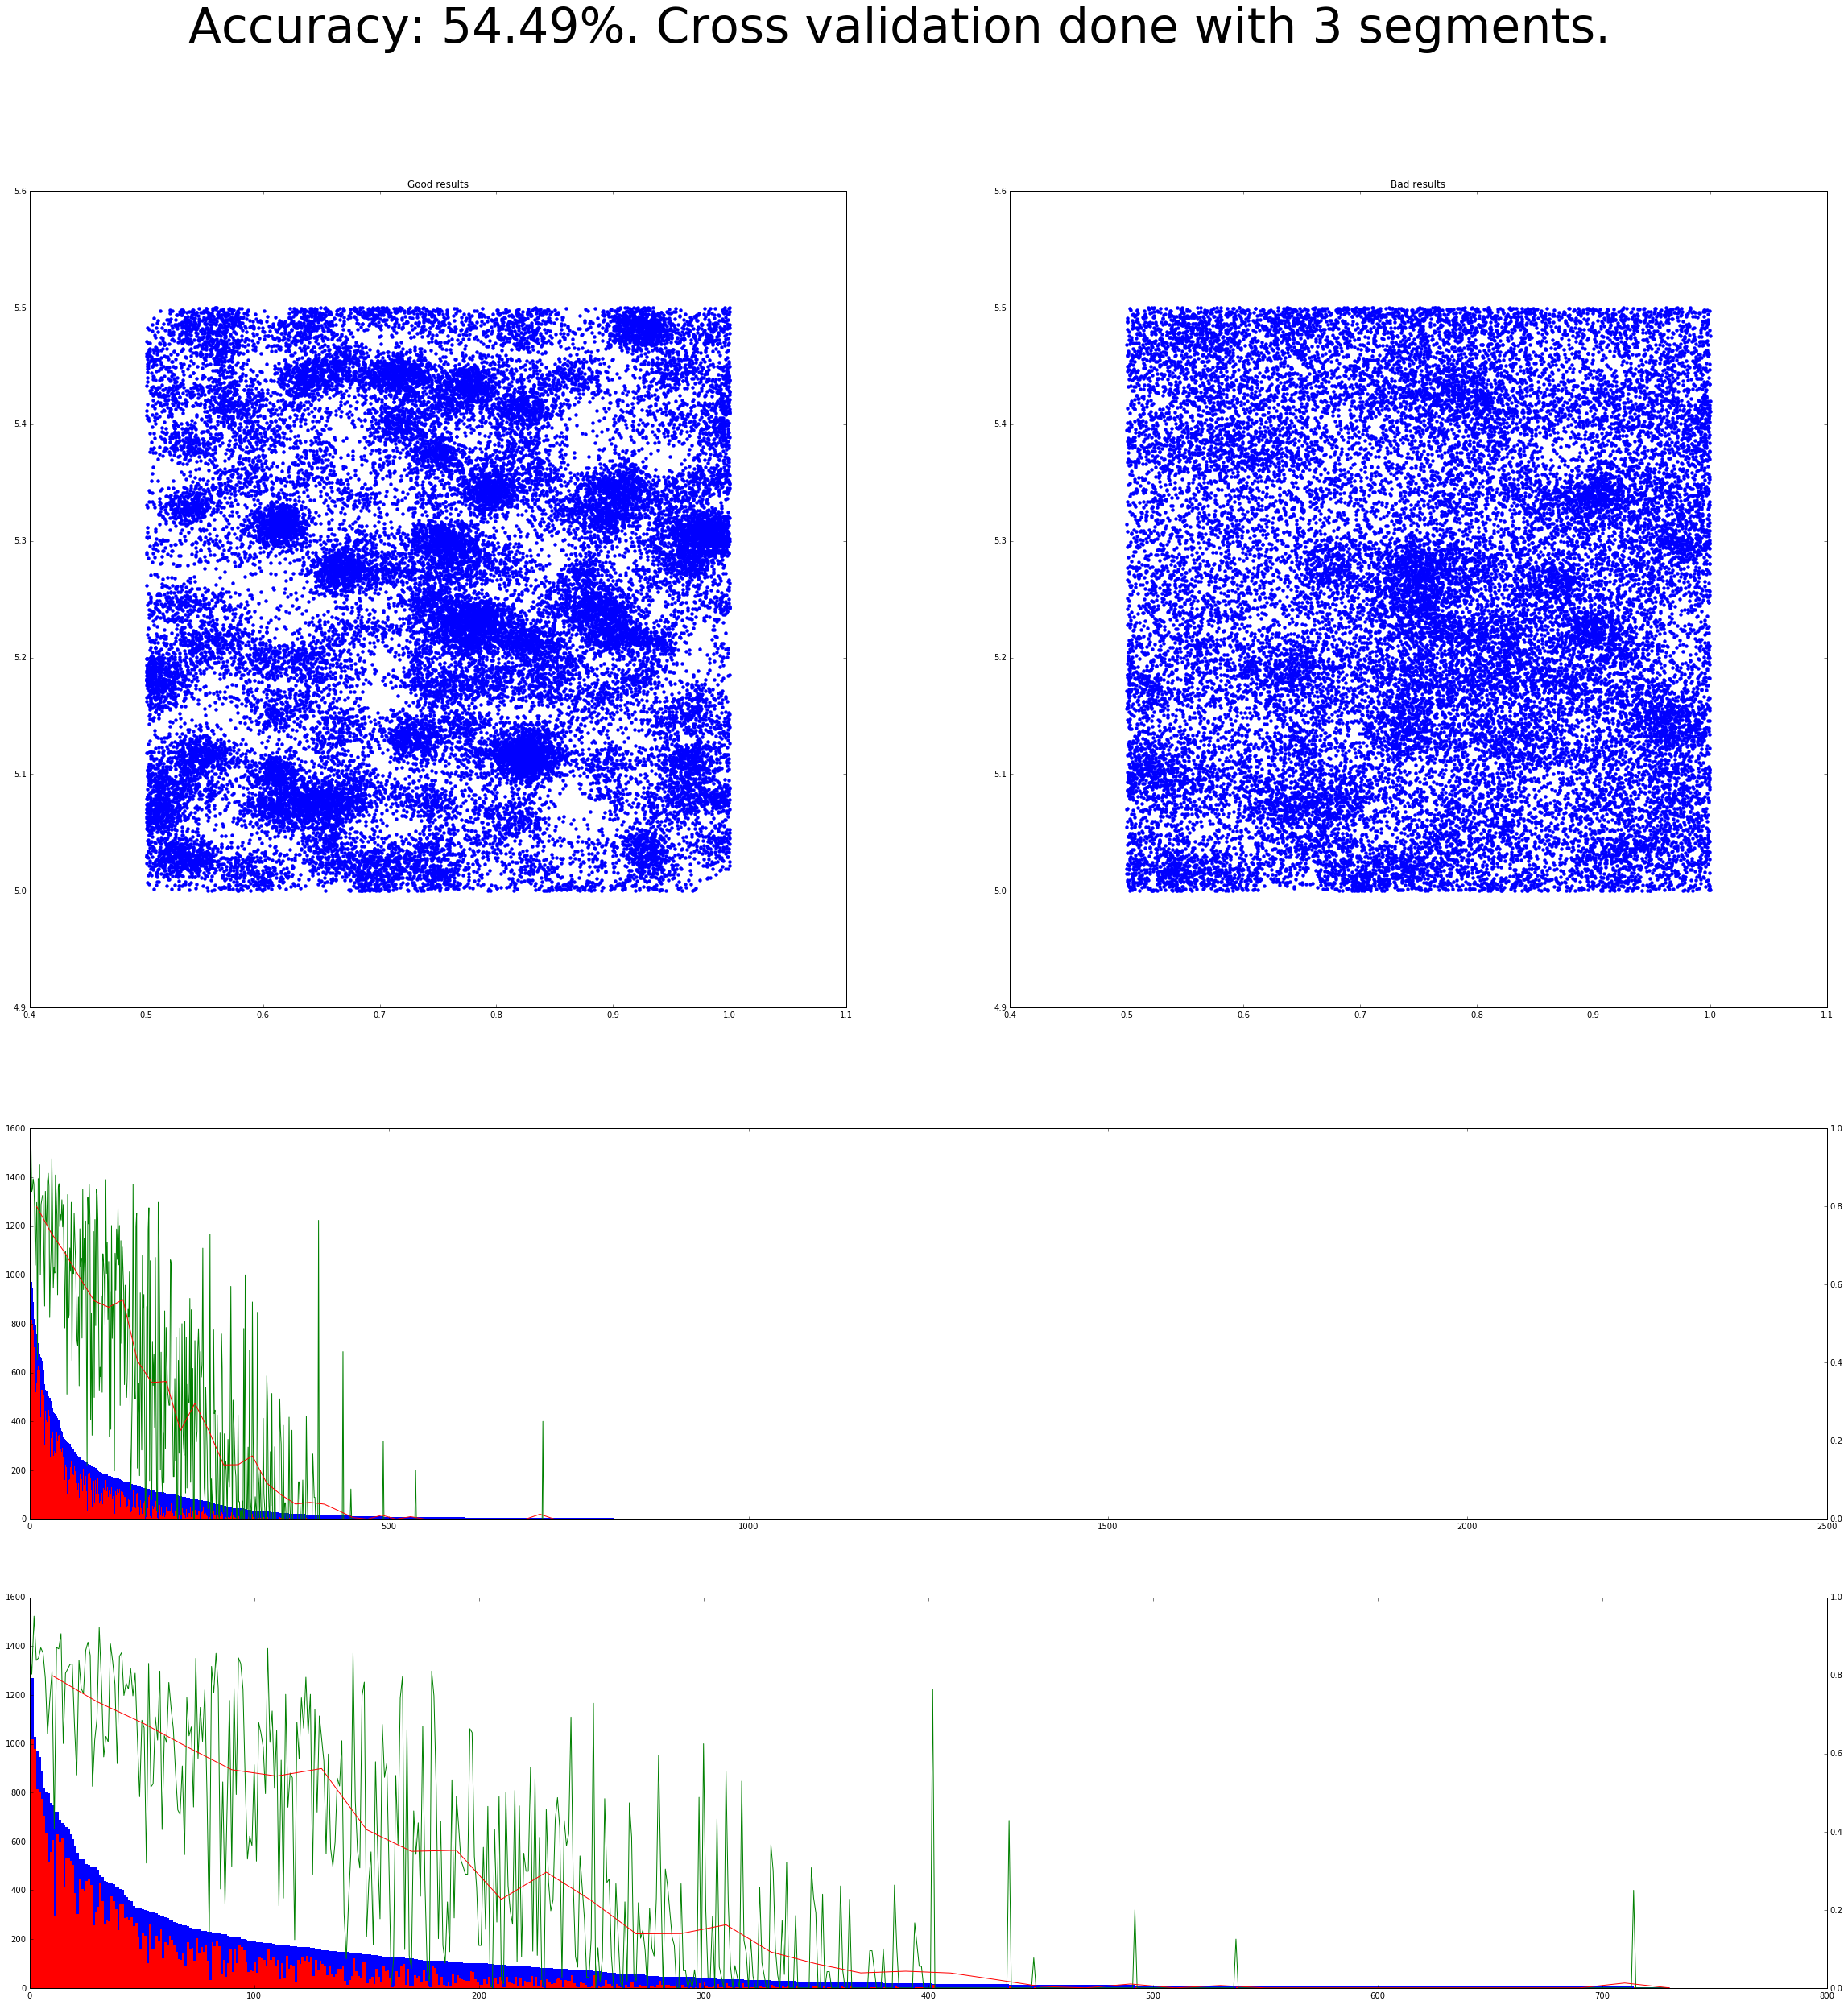

In [6]:
import figures

data=figures.Testor(X,y,cross_validation=3,grouping=20)

weights=[1/2,1,0.0005,1/18000,0.0001]
knn = KNeighborsClassifier(n_neighbors=15, 
                           algorithm='auto',
                           weights='distance',#'uniform' or 'distance'
                           metric='minkowski',
                           p=2,
                           metric_params=None, 
                           leaf_size=30, 
                           n_jobs=1)
fig=data.testNrate(knn,weights,'KNN')

In [7]:
# lets next in 02

In [ ]:
further :
    test different values
    implement in all square
    see where is the error :
        maybe not in the center
        maybe only on poor represented places:
            maybe there are not such ones in the submission
    compute size of square :
        with neighboring squares helping?
        each place id contained in one square?
    compute in several neighboring squares and take the best?
    classifications methods:
        real edges?
        Expectation maximization with the center?
    do script for automatic test: ----------------
        automatic results show:
            position
            what ids
    predict proba?
    see shape of output file
    group alone members and run another algo on them